In [54]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [56]:
display(train.head())
print(train.info())
print(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

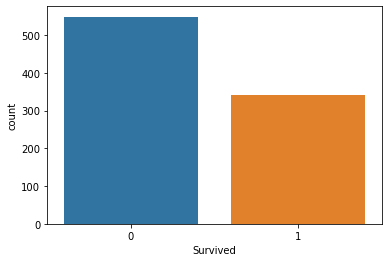

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [57]:
# Visualize with a countplot
sns.countplot(x="Survived", data=train)
plt.show()

# Print the proportions
print(train["Survived"].value_counts(normalize=1))

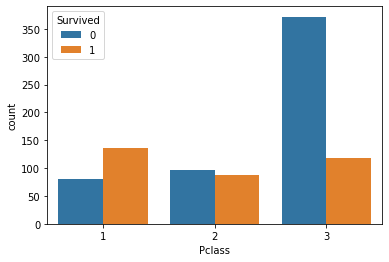

In [58]:
# Visualize with a countplot
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()



In [59]:
# Print the missing values in Age column
print(train["Age"].isnull().sum())

177


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


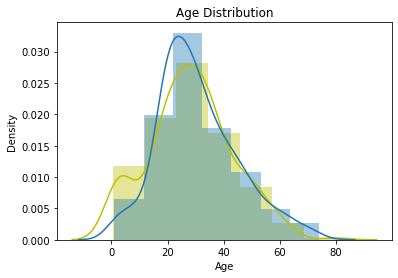

In [60]:
# Survived by age
sns.distplot(train[train.Survived==1]["Age"],color="y", bins=7)

# Death by age
sns.distplot(train[train.Survived==0]["Age"], bins=7)
plt.title("Age Distribution")
plt.show()

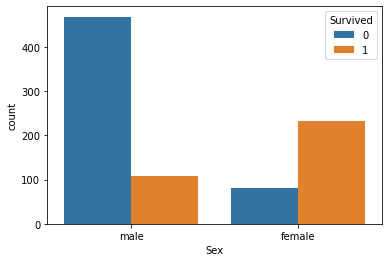

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
male      577
female    314
Name: Sex, dtype: int64


In [61]:
# Visualize with a countplot
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# Proportion of people survived for each class
print(train["Survived"].groupby(train["Sex"]).mean())

# How many people we have in each class?
print(train["Sex"].value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


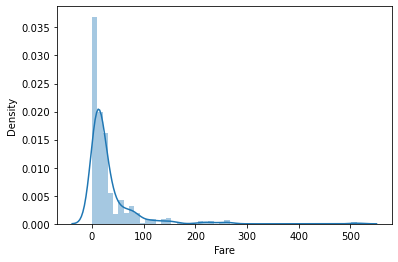

In [62]:
sns.distplot(train["Fare"])
plt.show()

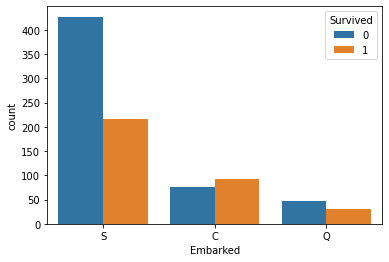

In [63]:
# Make a countplot
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()


**Feature Engineering**

In [64]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [65]:
# Put the mean into the missing value
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputers
imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

# Impute Embarked
train["Embarked"] = imp_embarked.fit_transform(train[["Embarked"]])
test["Embarked"] = imp_embarked.transform(test[["Embarked"]])

# Impute Age
train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]))
test["Age"] = np.round(imp_age.transform(test[["Age"]]))

NameError: name 'np' is not defined

In [67]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [68]:
from sklearn.preprocessing import LabelEncoder

# Initialize a Label Encoder
le = LabelEncoder()

# Encode Sex
train["Sex"] = le.fit_transform(train[["Sex"]])
test["Sex"] = le.fit_transform(test[["Sex"]])

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
train["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [70]:
# Family Size
train["Fsize"] = train["SibSp"] + train["Parch"]
test["Fsize"] = test["SibSp"] + test["Parch"]

In [71]:
train["Fsize"] ,train["SibSp"] ,train["Parch"]

(0      1
 1      1
 2      0
 3      1
 4      0
       ..
 886    0
 887    0
 888    3
 889    0
 890    0
 Name: Fsize, Length: 891, dtype: int64,
 0      1
 1      1
 2      0
 3      1
 4      0
       ..
 886    0
 887    0
 888    1
 889    0
 890    0
 Name: SibSp, Length: 891, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 886    0
 887    0
 888    2
 889    0
 890    0
 Name: Parch, Length: 891, dtype: int64)

In [72]:
train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [73]:
# Ticket first letters
train["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"] = test["Ticket"].apply(lambda x: str(x)[0])

# Cabin first letters
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])


In [74]:
train["Cabin"]

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: object

In [75]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [76]:
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [77]:
train["Title"] 

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [78]:
# Group the family_size column
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"
    


In [79]:
# Group the Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"
    


In [80]:
# Group the Title column    
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"


In [81]:
    
# Group the Cabin column  
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

In [82]:
# Family size
train["Fsize"] = train["Fsize"].apply(assign_passenger_label)
test["Fsize"] = test["Fsize"].apply(assign_passenger_label)


In [83]:
train["Fsize"]

0      Small_family
1      Small_family
2             Alone
3      Small_family
4             Alone
           ...     
886           Alone
887           Alone
888    Small_family
889           Alone
890           Alone
Name: Fsize, Length: 891, dtype: object

In [84]:
# Ticket
train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)


In [85]:
train["Ticket"]

0         Ticket_low
1        Ticket_high
2      Ticket_middle
3        Ticket_high
4         Ticket_low
           ...      
886    Ticket_middle
887      Ticket_high
888       Ticket_low
889      Ticket_high
890       Ticket_low
Name: Ticket, Length: 891, dtype: object

In [86]:

# Title
train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)



In [87]:
train["Title"]

0       Title_low
1      Title_high
2      Title_high
3      Title_high
4       Title_low
          ...    
886     Title_low
887    Title_high
888    Title_high
889     Title_low
890     Title_low
Name: Title, Length: 891, dtype: object

In [88]:
# Cabin
train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

In [89]:
train["Cabin"]

0       Cabin_low
1      Cabin_high
2       Cabin_low
3      Cabin_high
4       Cabin_low
          ...    
886     Cabin_low
887    Cabin_high
888     Cabin_low
889    Cabin_high
890     Cabin_low
Name: Cabin, Length: 891, dtype: object

In [90]:
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title", "Fsize"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title", "Fsize"], data=test, drop_first=True)

In [91]:
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,1,0,1,1,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,1,0,1,0,1,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,1,0,1,1,0,1,0,1,0,0,0


In [92]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

In [93]:
display(train.head())
display(test.head())

print(train.info())
print(test.info())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,22.0,7.2500,0,1,0,1,1,0,1,0,1,0,0,1
1,0,38.0,71.2833,0,0,0,0,0,0,0,0,0,0,0,1
2,0,26.0,7.9250,0,1,0,1,0,1,1,0,0,0,0,0
3,0,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,1,0,1,1,0,1,0,1,0,0,0


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,34.0,7.8292,0,1,1,0,1,0,1,0,1,0,0,0
1,0,47.0,7.0000,0,1,0,1,1,0,1,0,0,0,0,1
2,1,62.0,9.6875,1,0,1,0,0,1,1,0,1,0,0,0
3,1,27.0,8.6625,0,1,0,1,1,0,1,0,1,0,0,0
4,0,22.0,12.2875,0,1,0,1,1,0,1,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   891 non-null    int64  
 1   Age                   891 non-null    float64
 2   Fare                  891 non-null    float64
 3   Pclass_2              891 non-null    uint8  
 4   Pclass_3              891 non-null    uint8  
 5   Embarked_Q            891 non-null    uint8  
 6   Embarked_S            891 non-null    uint8  
 7   Ticket_Ticket_low     891 non-null    uint8  
 8   Ticket_Ticket_middle  891 non-null    uint8  
 9   Cabin_Cabin_low       891 non-null    uint8  
 10  Cabin_Cabin_middle    891 non-null    uint8  
 11  Title_Title_low       891 non-null    uint8  
 12  Title_Title_middle    891 non-null    uint8  
 13  Fsize_Big_family      891 non-null    uint8  
 14  Fsize_Small_family    891 non-null    uint8  
dtypes: float64(2), int64(1)

**Machine Learning**

In [94]:
from sklearn.model_selection import train_test_split

# Select the features and the target
X = train.values
y = target.values

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)